# Project 1 - Sport Linear Regression with R
## Determining a Player's MVP Award Share using Offensive Statistics
### Jenith Suvagia

# Objective
---
Within the last decade there has been a rise of advanced analytics and metrics in sports. This rise in Sports Analytics has led to teams in every sport seeking to gain an advantages through the means of "Number Crunching." One sport where analytics has become a huge influence is: Basketball. Basketball teams across the world, especially in the NBA, have began using analytics to make coaching, business, and marketing decisions. 

Winning in the NBA is directly tied to a team's: overal market value, revenue, and salary cap. For the players however, the better the player's performance, the higher the chances of that player being named *Most Valuable Player* for that season. Winning the *Most Valuable Player* Award allows the player to be eligle for the *Super Max* contract, which translates to the player's next contract being worth 30% of the team's revenue.[source](https://www.sportingnews.com/us/nba/news/award-voting-all-nba-mvp-salaries-contracts-supermax/xcuokxcwgqropuhnemfcprzq#:~:text=In%20order%20to%20be%20eligible,Win%20NBA%20MVP%20once). 

For these reasons, it is important for players to understand how to **maximize their chances of winning MVP.** For this report, our team was tasked with creating a _Linear Regression Model_ to **predict** a player's **MVP Award Share**. The MVP Award Share Percentage can be defined as: The percentage of votes a player recieved for MVP. 


In [20]:
library(dplyr)
library(ggplot2)

DF1 <- read.csv("AnaltyicsProjectDS.csv")

ERROR: Error in library(corrplot): there is no package called ‘corrplot’


# Data Exploration
---

Here we have imported the dataset file with the help of read.csv function. Below we can see that we have successfully imported the dataset that contains a list of all NBA players and their stats from the years 1982 - 2022. To show this we are printing out the first 5 rows of our dataset using the `head()` function and then printing the last 5 rows using the `tail()` function. Note that the `Season` column range is from 1982 - 2022. We will clean our data to get the desired 'range' of players in the following section. 

In [2]:
head(DF1,5)
tail(DF1,5)

,season,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,⋯,per,ts_pct,fg3a_per_fga_pct,fta_per_fga_pct,ast_pct,tov_pct,usg_pct,bpm,award_share,win_loss_pct
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2016,Stephen Curry,PG,27,GSW,79,79,34.2,10.2,20.2,⋯,31.5,0.669,0.554,0.250,33.7,12.9,32.6,11.9,1.000,0.890
2,2000,Shaquille O'Neal,C,27,LAL,79,79,40.0,12.1,21.1,⋯,30.6,0.578,0.001,0.495,19.3,9.9,31.2,9.3,0.998,0.817
3,2013,LeBron James,PF,28,MIA,76,76,37.9,10.1,17.8,⋯,31.6,0.640,0.188,0.395,36.4,12.4,30.2,11.7,0.998,0.805
4,2004,Kevin Garnett,PF,27,MIN,82,82,39.4,9.8,19.6,⋯,29.4,0.547,0.027,0.289,24.4,10.5,29.6,10.2,0.991,0.707
5,1996,Michael Jordan,SG,32,CHI,82,82,37.7,11.2,22.6,⋯,29.4,0.582,0.141,0.355,21.2,8.4,33.3,10.5,0.986,0.878


,season,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,⋯,per,ts_pct,fg3a_per_fga_pct,fta_per_fga_pct,ast_pct,tov_pct,usg_pct,bpm,award_share,win_loss_pct
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
17693,2022,Thaddeus Young,PF,33,TOT,52,1,16.3,2.7,5.2,⋯,17.0,0.548,0.176,0.180,17.7,15.0,17.4,2.2,0,0.500
17694,2022,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,⋯,25.4,0.603,0.395,0.358,46.7,14.5,34.4,5.2,0,0.524
17695,2022,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,⋯,17.4,0.546,0.045,0.247,11.0,13.0,19.9,-1.0,0,0.646
17696,2022,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,⋯,17.2,0.627,0.044,0.544,9.4,14.6,15.9,-2.1,0,0.329
17697,2022,Ivica Zubac,C,24,LAC,76,76,24.4,4.1,6.5,⋯,19.2,0.660,0.000,0.459,9.8,16.1,16.8,0.7,0,0.512


Now that we have confirmed that the data has been succesfully imported, we will print out the names of the columns. This will give us an idea of the data that we have to our disposal for our analysis. We are using the `names()` function to print out the names of the columns. 

In [3]:
names(DF1)

[1] "season"           "player"           "pos"              "age"             
 [5] "team_id"          "g"                "gs"               "mp_per_g"        
 [9] "fg_per_g"         "fga_per_g"        "fg_pct"           "fg3_per_g"       
[13] "fg3a_per_g"       "fg3_pct"          "fg2_per_g"        "fg2a_per_g"      
[17] "fg2_pct"          "ft_per_g"         "fta_per_g"        "ft_pct"          
[21] "orb_per_g"        "drb_per_g"        "trb_per_g"        "ast_per_g"       
[25] "stl_per_g"        "blk_per_g"        "tov_per_g"        "pts_per_g"       
[29] "mp"               "per"              "ts_pct"           "fg3a_per_fga_pct"
[33] "fta_per_fga_pct"  "ast_pct"          "tov_pct"          "usg_pct"         
[37] "bpm"              "award_share"      "win_loss_pct"

Now that we have an idea of the data available, we will `dim()` to see how large our data set is. 

In [4]:
dim(DF1)

[1] 17697    39

The `dim()` function gave an output of 17697 by 39. This means that we have a dataframe that has 17697 rows and 40 columns. In our case this translates to us having data on 17697 players, and 40 different statistical categories on each indivdual players' season.
Next we will look at the type/class of variable in the columns of our dataset.

In [5]:
str(DF1)

'data.frame':	17697 obs. of  39 variables:
 $ season          : int  2016 2000 2013 2004 1996 2014 1986 2010 1985 2011 ...
 $ player          : chr  "Stephen Curry" "Shaquille O'Neal" "LeBron James" "Kevin Garnett" ...
 $ pos             : chr  "PG" "C" "PF" "PF" ...
 $ age             : int  27 27 28 27 32 25 29 25 28 22 ...
 $ team_id         : chr  "GSW" "LAL" "MIA" "MIN" ...
 $ g               : int  79 79 76 82 82 81 82 76 80 81 ...
 $ gs              : int  79 79 76 82 82 81 81 76 77 81 ...
 $ mp_per_g        : num  34.2 40 37.9 39.4 37.7 38.5 38 39 39.5 37.4 ...
 $ fg_per_g        : num  10.2 12.1 10.1 9.8 11.2 10.5 9.7 10.1 11.5 8.8 ...
 $ fga_per_g       : num  20.2 21.1 17.8 19.6 22.6 20.8 19.6 20.1 22 19.7 ...
 $ fg_pct          : num  0.504 0.574 0.565 0.499 0.495 0.503 0.496 0.503 0.522 0.445 ...
 $ fg3_per_g       : num  5.1 0 1.4 0.1 1.4 2.4 1 1.7 0.7 1.6 ...
 $ fg3a_per_g      : num  11.2 0 3.3 0.5 3.2 6.1 2.4 5.1 1.6 4.8 ...
 $ fg3_pct         : num  0.454 0 0.406 0.25

Here we see that the we have primarily `numeric` type columns. This is expected as we are going to work with basketball statistics which are recorded in Numerical values. We also see that we have a `factor` type column. This is also expected as these columns contain individual names of players, teams, and positions. Now that we have a good udnerstanding on the dataframe, we are ready to begin **Data Cleaning**


# Data Cleaning
---

To clean our data we will first start by dropping the `unnecessary` columns that we have in our data set. To get an idea on what columns we will need/not need, we will print out the names of all columns and then decide which columns are not relevant to this investigation.   
_Note: as stated in the previous section, this investiagtion will focus primarily on Offensive Contributions_

In [6]:
DropColumns = c('team_id','drb_per_g' ,'stl_per_g' , 'blk_per_g' ,
                'tov_per_g' , 'per' , 'ts_pct' , 'tov_pct', 'fg3a_per_fga_pct', 
                'fta_per_fga_pct')

PlayerStats = DF1[, !(names(DF1) %in% DropColumns)]

# print first row to show it was dropped.
head(PlayerStats,2)

,season,player,pos,age,g,gs,mp_per_g,fg_per_g,fga_per_g,fg_pct,⋯,orb_per_g,trb_per_g,ast_per_g,pts_per_g,mp,ast_pct,usg_pct,bpm,award_share,win_loss_pct
,<int>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2016,Stephen Curry,PG,27,79,79,34.2,10.2,20.2,0.504,⋯,0.9,5.4,6.7,30.1,2700,33.7,32.6,11.9,1.000,0.890
2,2000,Shaquille O'Neal,C,27,79,79,40.0,12.1,21.1,0.574,⋯,4.3,13.6,3.8,29.7,3163,19.3,31.2,9.3,0.998,0.817


Now we will drop all NA/NULL/"0" values. Given the size of our dataset, it is safe to assume that after dropping these values there will be plenty of availble data left. W have made the decision to drop all values of `0` as player's who have the value pf `0` in any offensive statistic are not providing an impact to their teams performance. To do so, we will transfrom all values of `0` to `NA` values. Then we will use `complete.cases()` to automatically drop all `NA` values. To verify, we will print out the number of `NA` values in the dataframe after dropping all values. 

In [7]:
PlayerStats[PlayerStats == 0] = NA
PlayerStats = PlayerStats[complete.cases(PlayerStats), ]
num.na = sum(colSums(PlayerStats==0)) / nrow(PlayerStats)
cat("There are", num.na ,"cells in the dataframe with a value = 0")

There are 0 cells in the dataframe with a value = 0

From the printed statement above, we have confirmed that we have removed all cells who's value = 0.   

Now we will filter out players that we do not beleive were impactful to winning. This will help improve the accuracy of our model, as we will be considering "Star" players. To do so we will filter out all players that:  
- Did not average more than 15.0 points per game 
- Played less than: 30 minutes 
- Played in less than: 50 games 
- Are older than: 39 
- Attempted less than 8 field goals per game 
- Played in the season from 2005-2022
- Recieved at least 5% of votes for MVP

We will call this 'filtered' dataframe `NBAStars`. We will then sort the dataframe in ascending order with respect to the `season` column.

In [8]:
NBAStars = PlayerStats[PlayerStats$pts_per_g >10.0, ]  
NBAStars = NBAStars[NBAStars$mp_per_g > 30, ]
NBAStars = NBAStars[NBAStars$g > 50, ]
NBAStars = NBAStars[NBAStars$age <= 39, ]
NBAStars = NBAStars[NBAStars$fga_per_g > 8, ]
NBAStars = NBAStars[NBAStars$season >= 2007,  ]
NBAStars = NBAStars[NBAStars$award_share >= 0.05, ]
NBAStars = NBAStars[order(NBAStars$season),]
head(NBAStars)

,season,player,pos,age,g,gs,mp_per_g,fg_per_g,fga_per_g,fg_pct,⋯,orb_per_g,trb_per_g,ast_per_g,pts_per_g,mp,ast_pct,usg_pct,bpm,award_share,win_loss_pct
,<int>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
24,2007,Dirk Nowitzki,PF,28,78,78,36.2,8.6,17.2,0.502,⋯,1.6,8.9,3.4,24.6,2820,17.8,28.9,8.3,0.882,0.817
38,2007,Steve Nash,PG,32,76,76,35.3,6.8,12.8,0.532,⋯,0.4,3.5,11.6,18.6,2682,50.1,22.9,5.9,0.785,0.744
105,2007,Kobe Bryant,SG,28,77,77,40.8,10.6,22.8,0.463,⋯,1.0,5.7,5.4,31.6,3140,25.5,33.6,5.9,0.404,0.512
194,2007,LeBron James,SF,22,78,78,40.9,9.9,20.8,0.476,⋯,1.1,6.7,6.0,27.3,3190,29.1,31.0,8.1,0.142,0.610
221,2007,Tracy McGrady,SG,27,71,71,35.8,9.0,20.8,0.431,⋯,0.8,5.3,6.5,24.6,2539,37.5,35.0,6.1,0.085,0.634
28,2008,Kobe Bryant,SG,29,82,82,38.9,9.5,20.6,0.459,⋯,1.1,6.3,5.4,28.3,3192,23.9,31.4,5.8,0.873,0.695


Finally, we will rename our column of interest from `award_share` to `MVP`. 

In [9]:
colnames(NBAStars)[colnames(NBAStars) == "award_share"] ="MVP"

Now that our data is clean and we only have players that are 'valuable' to our investigation.


# Adaptation

---

In this section we have created two additional columns that are necessary for our study. The four columns we created are:
- Assists for Season: Total Assists that the player recorded for that particular season.
- Points for Season: Total Points that player scored for that particular season.
- Points Per Minute: Points the player averages per minute while playing.
- Assists Per Minute: Assists the player averages per minute while playing. 

This additional information will allow us to compare the players to one another on a "Per Minute" basis. This will "cancel out" the bias of using _Points Per Game_ as some players played more minutes than others, leading to more scoring opportunities.


In [10]:
SeasonPoints <- NBAStars['pts_per_g']*NBAStars['g']
NBAStars['SeasonPoints'] <- SeasonPoints

SeasonAssists <- NBAStars['ast_per_g'] * NBAStars['g']
NBAStars['SeasonAssists'] <- SeasonAssists

PointsPerMin <- NBAStars['SeasonPoints']/NBAStars['mp']
NBAStars['PointsPerMin'] <- PointsPerMin

AssistsPerMin <- NBAStars['SeasonAssists']/NBAStars['mp']
NBAStars['AssistsPerMin'] <- AssistsPerMin

In [11]:
head(NBAStars,10)

,season,player,pos,age,g,gs,mp_per_g,fg_per_g,fga_per_g,fg_pct,⋯,mp,ast_pct,usg_pct,bpm,MVP,win_loss_pct,SeasonPoints,SeasonAssists,PointsPerMin,AssistsPerMin
,<int>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
24,2007,Dirk Nowitzki,PF,28,78,78,36.2,8.6,17.2,0.502,⋯,2820,17.8,28.9,8.3,0.882,0.817,1918.8,265.2,0.6804255,0.09404255
38,2007,Steve Nash,PG,32,76,76,35.3,6.8,12.8,0.532,⋯,2682,50.1,22.9,5.9,0.785,0.744,1413.6,881.6,0.5270694,0.32870992
105,2007,Kobe Bryant,SG,28,77,77,40.8,10.6,22.8,0.463,⋯,3140,25.5,33.6,5.9,0.404,0.512,2433.2,415.8,0.7749045,0.13242038
194,2007,LeBron James,SF,22,78,78,40.9,9.9,20.8,0.476,⋯,3190,29.1,31.0,8.1,0.142,0.610,2129.4,468.0,0.6675235,0.14670846
221,2007,Tracy McGrady,SG,27,71,71,35.8,9.0,20.8,0.431,⋯,2539,37.5,35.0,6.1,0.085,0.634,1746.6,461.5,0.6879086,0.18176447
28,2008,Kobe Bryant,SG,29,82,82,38.9,9.5,20.6,0.459,⋯,3192,23.9,31.4,5.8,0.873,0.695,2320.6,442.8,0.7270050,0.13872180
54,2008,Chris Paul,PG,22,80,80,37.6,7.9,16.1,0.488,⋯,3006,52.2,25.7,10.4,0.710,0.683,1688.0,928.0,0.5615436,0.30871590
119,2008,LeBron James,SF,23,75,74,40.4,10.6,21.9,0.484,⋯,3027,37.3,33.5,10.9,0.348,0.549,2250.0,540.0,0.7433102,0.17839445
11,2009,LeBron James,SF,24,81,81,37.7,9.7,19.9,0.489,⋯,3054,38.0,33.8,13.2,0.969,0.805,2300.4,583.2,0.7532417,0.19096267


# Data Visualization
---

To understand how the data in this data set relates to one another, we made a few visualizations of our data set to help show different aspects of our data. The first visualization we made was a histogram of the Player Age to show the distribution of the Player Ages in our data set. As can be seen below, the majority of players fall in between the ages of 25-30.

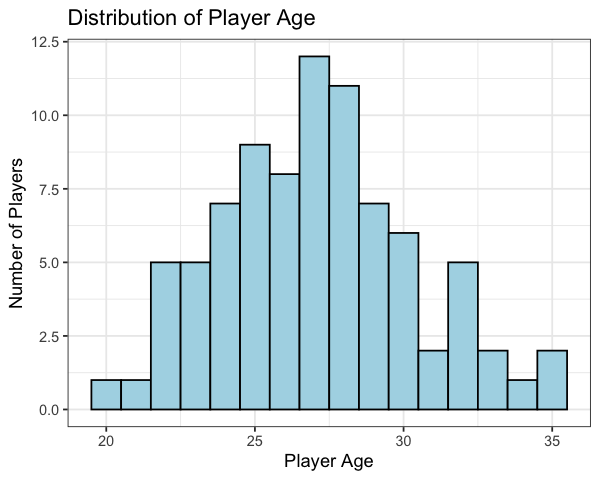

In [12]:
options(repr.plot.width = 5, repr.plot.height = 4)
ggplot(NBAStars, aes(age)) + geom_histogram(binwidth = 1, color = "black", fill = "light blue") + theme_bw() +
labs(title = "Distribution of Player Age", x = "Player Age", y = "Number of Players") 


The next plot we created was a _Box Plot_ the Box Plot was used to show the distribution of the MVP award share by position in the data set. As can be seen below, the award share is not exclusive to one position, however, it is heavily favored to the 'PG' position.

Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


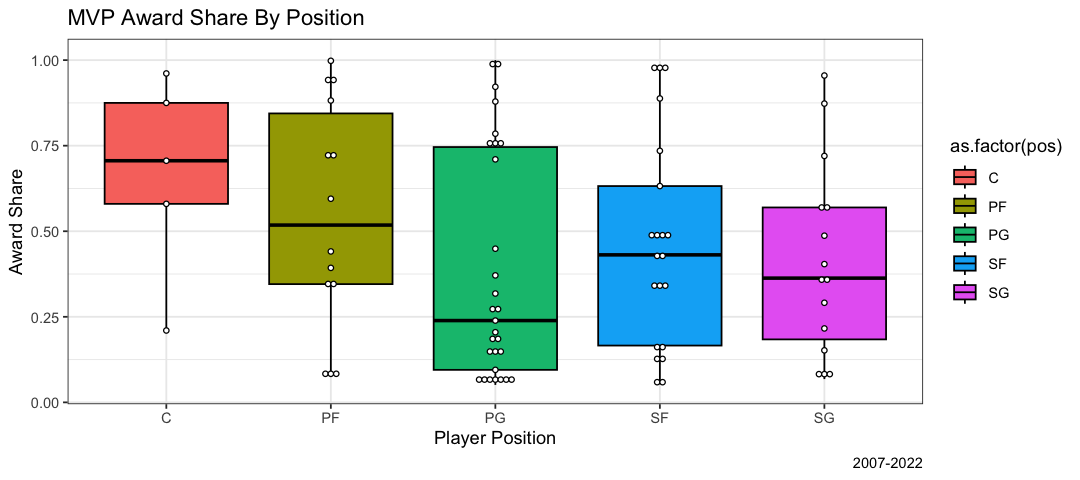

In [13]:
options(repr.plot.width = 9, repr.plot.height = 4)

ggplot(NBAStars, aes(x = as.factor(pos), y = MVP, fill = as.factor(pos))) + 
geom_boxplot(outlier.colour="black", outlier.shape=16,outlier.size=2, notch=FALSE, color = "black") + theme_bw() +
labs(title = "MVP Award Share By Position", caption = "2007-2022", x = "Player Position", y = "Award Share") +
geom_dotplot(binaxis='y', stackdir='center', dotsize=0.5, fill = "white")

The pie chart below was used to visualize the distribution of the "slices" of players that have recieved votes for MVP. For example, 30.95 percent of players recieved 0-20% of votes in the timeframe from 2007 - 2022.

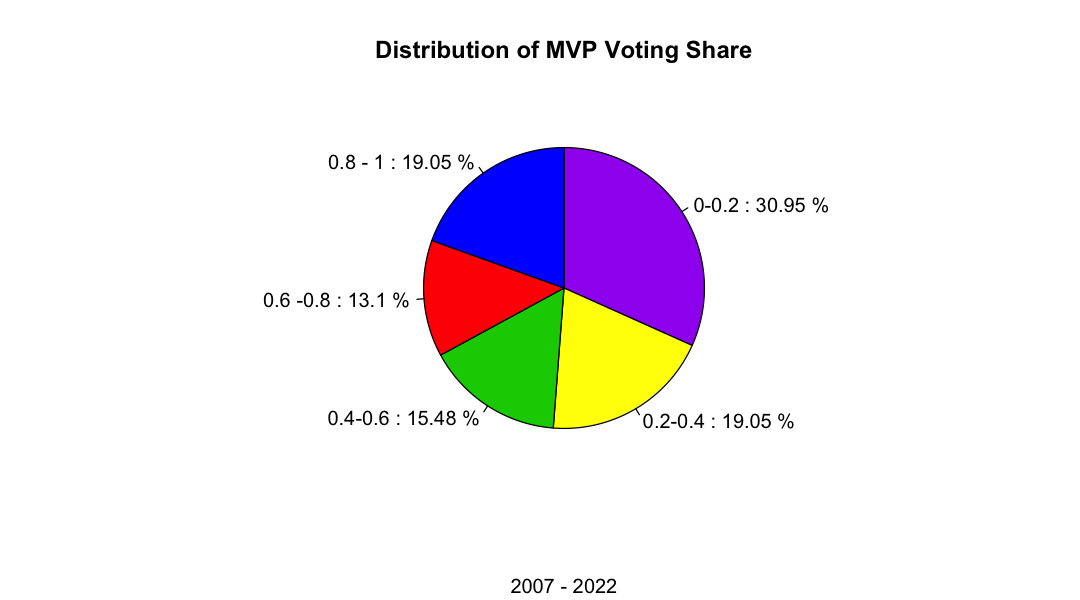

In [14]:
options(repr.plot.width = 9, repr.plot.height = 5)
# getting totals 
group1 = sum(nrow(subset(NBAStars, MVP >0 & MVP <= 0.2) ) )
group2 = sum(nrow(subset(NBAStars, MVP >=0.21 & MVP <=0.4) ) )
group3 = sum(nrow(subset(NBAStars, MVP >=0.41 & MVP <= 0.6) ) )
group4 = sum(nrow(subset(NBAStars, MVP >= 0.61 & MVP <=0.8) ) )
group5 = sum(nrow(subset(NBAStars, MVP >= 0.81) ) )

# get percentages
total = c(group1, group2, group3,group4,group5)
pct = total/nrow(NBAStars) * 100
pct = round(pct,2)

#make labels
labels =c("0-0.2", "0.2-0.4", "0.4-0.6","0.6 -0.8","0.8 - 1")
labels = paste(labels,":",pct,"%")
col = c("purple", "yellow", "green3","red", "blue")
pie(total, labels = labels, col = col, clockwise = TRUE, main = "Distribution of MVP Voting Share", sub = "2007 - 2022")

The final visualization we made was a bar plot displaying the value of the Award Share that the winner for MVP recieved that year. To do this, we simply extracted the max value of every season. It is important to note. that the 2016 and 2013 season had unanimous MVPs.

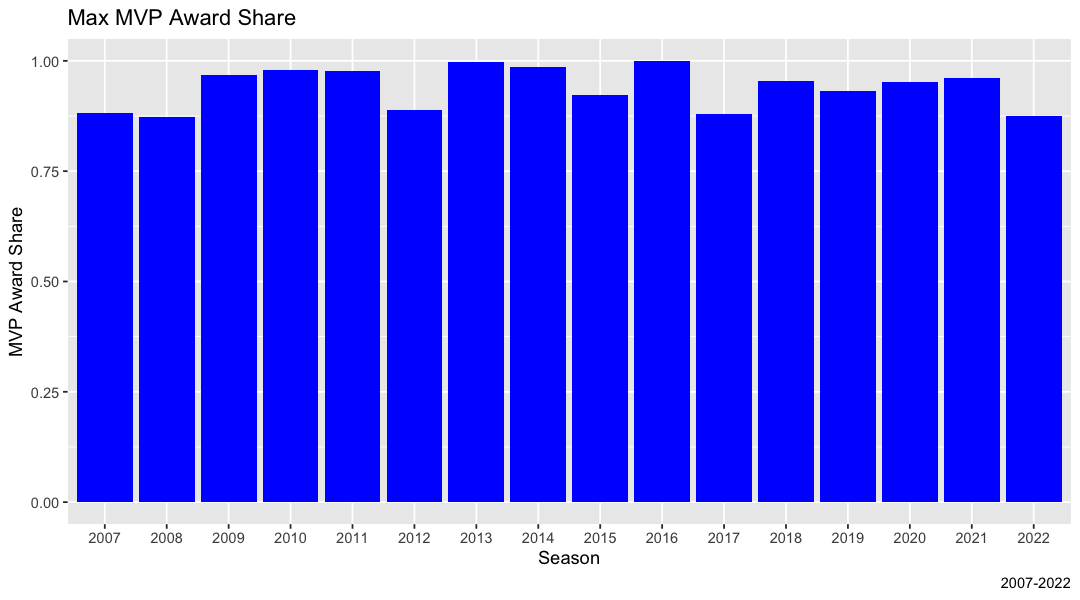

In [15]:
library(dplyr)
pastwinners = NBAStars %>% group_by(season) %>% filter(MVP == max(MVP) )

ggplot(pastwinners, aes(x=as.factor(season), y=MVP)) + 
geom_bar(stat = "identity",  fill = "blue")  +
 
labs(title ="Max MVP Award Share", caption = "2007-2022", x="Season", y="MVP Award Share") 


# Response Variable

---
Our response variable is `MVP`. The `MVP` column is a numerical column that represents the percentage of votes a player recieved in decimal form. The voting ssytem for `MVP` in the NBA consists of a panel of 100 independent media members who are presented with the stats of the eligible players for that season (similiar to our dataset). Each media member then votes for one player and the player with the most votes after the selection process is the winner. By predicting the percentage of votes that a player will recieve for MVP given their performance for the season to that point will allow the player to gauge what statistics they must improve to guarantee they win the MVP award. 

# Explore Correlations
---

Before we begin to make Linear Regression Models, it is important for us to identify correleations in our data set. Identifying the correleations will allow us to choose better `pairs` when creating our Linear Regression Models. As we can only see correleation between `Numeric` columns, we will drop the `Player` and `Position` columns from our data frame. This will not impact our investigation as the players' dominance and impact on the team's performance will not be dependent on position. 

corrplot 0.95 loaded



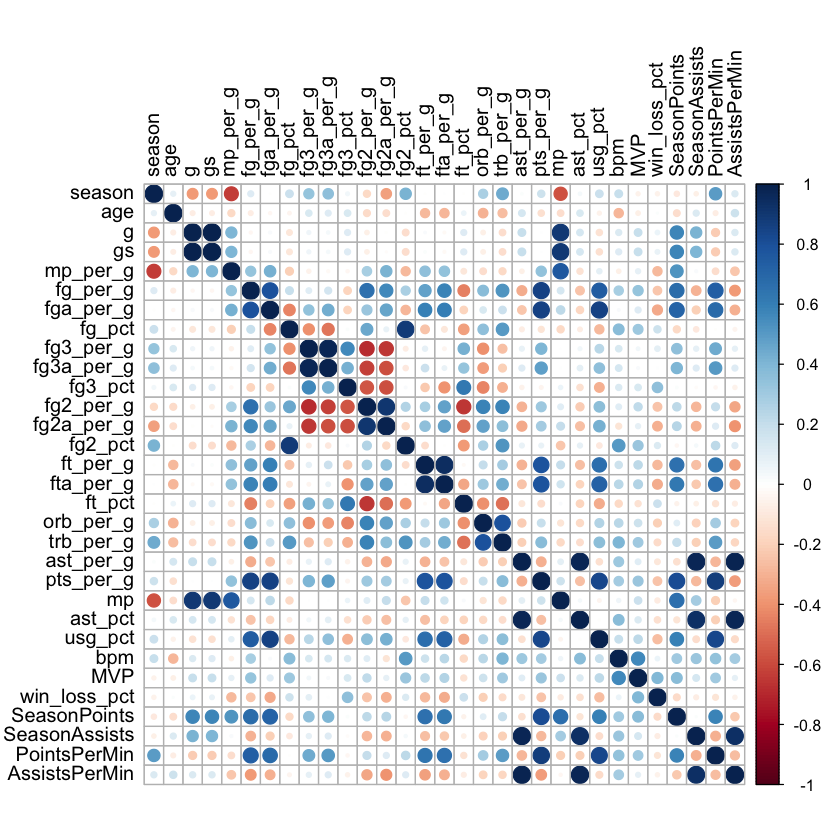

In [22]:
library(corrplot)
options(repr.plot.width = 7, repr.plot.height = 7)

DropColumns = c('player', 'pos')
NBAStars.numeric = NBAStars[, !(names(NBAStars) %in% DropColumns)]
correlation = cor(NBAStars.numeric)
corrplot(correlation, tl.col = "black")

The correlation matrix is shown above. Variables with a _positive_ correlation to `MVP` will be _blue_. Variables with a _negative_ linear correlation to `MVP` will be _red_. The matrix/heatmap shown above has a scale for reference.

As can be seen in the matrix, there are a few negative relationships between `MVP` and other variables such as : `Age`, `Ft-Pct`, and `3 Point Field Goals Attempted Per Game`. There is a strong positive relationship between `MVP` and `bpm`. BPM is `Box Plus-Minus` which is a measure of a team's performance with the player as opposed to without the player. For example, a value of "3" means that the team is 3 points better with the player playing than with the player on the bench. 

To view the variables that have a positive relationship with `MVP`, we will print out the values with a correleation coefficient that is *greater* than 0.

In [23]:
correlation  = round(correlation, digits = 2)

for ( col in 1:ncol(NBAStars.numeric)){

    if( correlation[25, col] > 0)
        print(colnames(NBAStars.numeric[col]) )
}


[1] "season"
[1] "g"
[1] "gs"
[1] "fg_per_g"
[1] "fga_per_g"
[1] "fg_pct"
[1] "fg3_per_g"
[1] "fg3a_per_g"
[1] "fg3_pct"
[1] "fg2_per_g"
[1] "fg2_pct"
[1] "ft_per_g"
[1] "fta_per_g"
[1] "orb_per_g"
[1] "trb_per_g"
[1] "ast_per_g"
[1] "pts_per_g"
[1] "mp"
[1] "ast_pct"
[1] "usg_pct"
[1] "bpm"
[1] "MVP"
[1] "win_loss_pct"
[1] "SeasonPoints"
[1] "SeasonAssists"
[1] "PointsPerMin"
[1] "AssistsPerMin"


From the printout above, we can see the variables that have a _Positive Linear Relationship_ with `MVP`. These variables are variables that will be used as **Predictors** in our **Linear Regression Models**.


# Simple Linear Regression

---

### Simple Linear Regression Model 1

For our first model, we decided to determine the impact that `Box Plus Minus` (bpm column) has on `MVP`. The expectation here is that the impact will be high as the Box Plus Minus is a statistic used to measure a players impact to the team in compariosn to them being off of the team. 

From the summary of our model printed below, we see that the equation of the best-fit line is: 
$$ Y = -0.13989 + 0.07380X_1 $$

The model has an **Adjusted R-square Value** of 0.3162 which means that the `bpm` column accounts for 31.62% of variation in `MVP` voting percentage. The **p-value** of $ 1.5 * 10^{-8}$ is well below the _common threshold_ of 0.05. This suggests that **`bpm` is a significant indicator of `MVP`**. [source](https://www.simplypsychology.org/p-value.html)

In [24]:
SM1 = lm(MVP~bpm, data = NBAStars)
SM1 = summary(SM1)
SM1


Call:
lm(formula = MVP ~ bpm, data = NBAStars)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5129 -0.2221 -0.0332  0.2115  0.6150 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.13989    0.09842  -1.421    0.159    
bpm          0.07380    0.01176   6.275 1.56e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2622 on 82 degrees of freedom
Multiple R-squared:  0.3244,	Adjusted R-squared:  0.3162 
F-statistic: 39.38 on 1 and 82 DF,  p-value: 1.563e-08


### Simple Linear Regression Model 2

For our second model, we decided to determine the impact that `Points Per Min` (PointsPerMin Column) has on `MVP`. 

From the summary of our model printed below, we see that the equation of the best-fit line is: 
$$ Y = -0.2420 + 0.9346X_1 $$

The model has an **Adjusted R-square Value** of 0.07912 which means that the `PointsPerMin` column accounts for 7.9% of variation in `MVP` voting percentage. The **p-value** of $ 0.005$ is well below the _common threshold_ of 0.05. This suggests that **`PointsPerMin` is a significant indicator of `MVP`.**


In [25]:
SM2 = lm(MVP~PointsPerMin, data = NBAStars)
SM2 = summary(SM2)
SM2


Call:
lm(formula = MVP ~ PointsPerMin, data = NBAStars)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.47706 -0.26590 -0.03718  0.26956  0.59356 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)   -0.2420     0.2453  -0.987   0.3268   
PointsPerMin   0.9346     0.3278   2.851   0.0055 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3042 on 82 degrees of freedom
Multiple R-squared:  0.09021,	Adjusted R-squared:  0.07912 
F-statistic: 8.131 on 1 and 82 DF,  p-value: 0.005505


### Simple Linear Regression Model 3

For our third model, we decided to determine the impact that `Assists Per Min` (AssistsPerMin Column) has on `MVP`. 

From the summary of our model printed below, we see that the equation of the best-fit line is: 
$$ Y = 0.3812 + 0.9346X_1 $$

The model has an **Adjusted R-square Value** of 0-0.00551 which means that the `AssistsPerMin` column accounts for -0.5% of variation in `MVP` voting percentage. The negative **Adjusted R-square Value** suggests that `AssistsPerMin` _is not a reliable predictor for our response variable._  The **p-value** of $ 0.4624$ is well above the _common threshold_ of 0.05. This suggests that **`AssistsPerMin` is a not significant indicator of `MVP`.** 



In [26]:
SM3 = lm(MVP~AssistsPerMin, data = NBAStars)
SM3 = summary(SM3)
SM3


Call:
lm(formula = MVP ~ AssistsPerMin, data = NBAStars)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.41599 -0.28942 -0.05222  0.26755  0.55103 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.3812     0.1008   3.782 0.000295 ***
AssistsPerMin   0.3769     0.5105   0.738 0.462387    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3179 on 82 degrees of freedom
Multiple R-squared:  0.006605,	Adjusted R-squared:  -0.00551 
F-statistic: 0.5452 on 1 and 82 DF,  p-value: 0.4624


### Simple Linear Regression Model 4

For our fourth model, we decided to determine the impact that `Field Goal Percentage` (fg_pct Column) has on `MVP`. 

From the summary of our model printed below, we see that the equation of the best-fit line is: 
$$ Y = -0.8068 + 2.5751X_1 $$

The model has an **Adjusted R-square Value** of 0.08813 which means that the `PointsPerMin` column accounts for 8.8% of variation in `MVP` voting percentage. The **p-value** of $ 00.003538$ is well below the _common threshold_ of 0.05. This suggests that **`fg_pct` is a significant indicator of `MVP`.**


In [27]:
SM4 = lm(MVP~fg_pct, data = NBAStars)
SM4 = summary(SM4)
SM4


Call:
lm(formula = MVP ~ fg_pct, data = NBAStars)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.48144 -0.27001 -0.01571  0.23345  0.63787 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -0.8068     0.4201  -1.921  0.05827 . 
fg_pct        2.5751     0.8574   3.004  0.00354 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3027 on 82 degrees of freedom
Multiple R-squared:  0.09911,	Adjusted R-squared:  0.08813 
F-statistic: 9.021 on 1 and 82 DF,  p-value: 0.003538


### Simple Linear Regression Model 5

For our second model, we decided to determine the impact that `Win Loss Percentage` (win_loss_pct Column) has on `MVP`. 

From the summary of our model printed below, we see that the equation of the best-fit line is: 
$$ Y = -0.6307 + 1.6101X_1 $$

The model has an **Adjusted R-square Value** of 0.1492 which means that the `win_loss_pct` column accounts for 14.92% of variation in `MVP` voting percentage. The **p-value** of $ 0.000168$ is well below the _common threshold_ of 0.05. This suggests that **`win_loss_pct` is a significant indicator of `MVP`.**


In [28]:
SM5 = lm(MVP~win_loss_pct, data = NBAStars)
SM5 = summary(SM5)
SM5


Call:
lm(formula = MVP ~ win_loss_pct, data = NBAStars)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.63380 -0.23822 -0.03223  0.23814  0.58708 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.6307     0.2761  -2.284 0.024952 *  
win_loss_pct   1.6101     0.4082   3.944 0.000168 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2924 on 82 degrees of freedom
Multiple R-squared:  0.1595,	Adjusted R-squared:  0.1492 
F-statistic: 15.56 on 1 and 82 DF,  p-value: 0.000168


## Simple Linear Regression Model Comparison
---

To compare the 5 simple models, I will use the **Adjusted R Squared Value** to determine the accuracy of the models.  

The **Adjusted R-squared value can be defined as**: 
* A modified version of R-squared that has been adjusted for the number of predictors in the model (in this case 1). The adjusted R-squared increases when the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected. [Source](https://www.investopedia.com/ask/answers/012615/whats-difference-between-rsquared-and-adjusted-rsquared.asp)

This means that the higher the *R Squared Value* the more accurate the model is. Since one of our models, SM3, had a **p-value** over the _common threshold_, this model will be disqualified from consideration.



In [29]:
# using cat to print all at once 

cat("Adjusted R-squared value of Model 1 is:", SM1$adj.r.squared, 
    "\nAdjusted R-squared vaule of Model 2 is:", SM2$adj.r.squared, 
    "\nAdjusted R-squared value of Model 3 is:", SM3$adj.r.squared, 
    "\nAdjusted R-squared value of Model 4 is:", SM4$adj.r.squared, 
    "\nAdjusted R-squared value of Model 5 is:", SM5$adj.r.squared)

Adjusted R-squared value of Model 1 is: 0.3162054 
Adjusted R-squared vaule of Model 2 is: 0.07911562 
Adjusted R-squared value of Model 3 is: -0.005509507 
Adjusted R-squared value of Model 4 is: 0.08812514 
Adjusted R-squared value of Model 5 is: 0.1492041

From the printout above, it is clear that the best performing model is *Simple Linear Regression Model 1*. This model had an **adjusted R-square Value** of 0.3162054. This means that 'bpm' accounts for 31.6% of variation in `MVP`. A plot of this model is shown below to provide visualization:

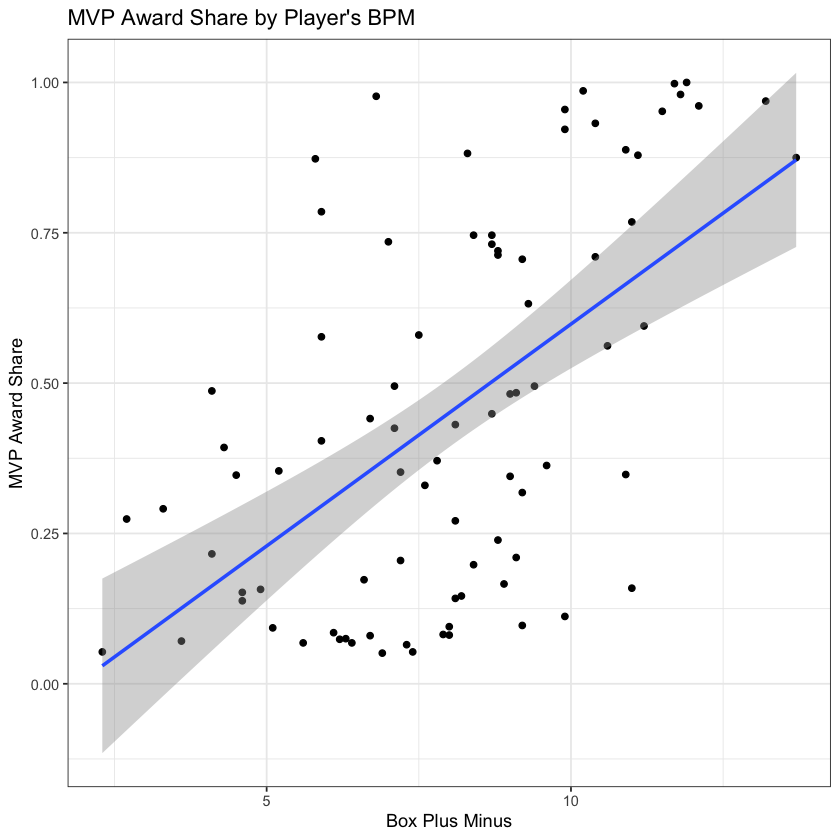

In [30]:
library(ggplot2)

ggplot(NBAStars, aes(bpm,MVP) ) +
geom_point() + theme_bw() +
geom_smooth(method = 'lm', formula = y~x) +
labs(title = "MVP Award Share by Player's BPM", x = "Box Plus Minus", y = "MVP Award Share" )

# Multiple Linear Regression

---

### Multiple Linear Regression Model 1 

In an attempt to provide a more accurate model, we will use multiple _predictor_ variables in our following Linear Regression Models to improve performance.

Our first Multiple Linear Regression Model will use the predictor variables: `bpm`, `win_loss_pct`.

From the summary of our model printed below, we see that the equation of the best-fit line is: 
$$ Y = -1.09322 + 1.45775X_1 + 0.07055X_2 $$

The model has an **Adjusted R-square Value** of 0.441 which means that combined the `win_loss_pct` and `bpm` columns account for 44.1% of variation in `MVP` voting percentage. The **p-value** of $ 2.18 * 10^{-11}$ is well below the _common threshold_ of 0.05. This suggests that **the combination of predictor variables in this model are a significant indicator of `MVP`**.

In [31]:
CM1 = lm(MVP ~ win_loss_pct + bpm, data = NBAStars)
CM1 = summary(CM1)
CM1


Call:
lm(formula = MVP ~ win_loss_pct + bpm, data = NBAStars)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.53356 -0.16374 -0.00277  0.19436  0.54389 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.09322    0.23446  -4.663 1.21e-05 ***
win_loss_pct  1.45775    0.33170   4.395 3.33e-05 ***
bpm           0.07055    0.01066   6.619 3.63e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.237 on 81 degrees of freedom
Multiple R-squared:  0.4545,	Adjusted R-squared:  0.441 
F-statistic: 33.75 on 2 and 81 DF,  p-value: 2.186e-11


### Multiple Linear Regression Model 2 

Our second Multiple Linear Regression Model will use the predictor variables: `win_loss_pct`, `bpm`, `fg_pct`, `fg3_pct`, and `trb_per_g`.

From the summary of our model printed below, we see that the equation of the best-fit line is: 
$$ Y = -1.24001 + 1.59523 X_1 +  0.06146 X_2 +  -0.06679 X_3 + 0.02152 X_4 $$

The model has an **Adjusted R-square Value** of 0.4524 which means that combined the `win_loss_pct`, `bpm`, `fg_pct`, `fg3_pct`, and `trb_per_g` columns account for 45.24% of variation in `MVP` voting percentage. The **p-value** of $ 1.39 * 10^{-10}$ is well below the _common threshold_ of 0.05. This suggests that **the combination of predictor variables in this model are a significant indicator of `MVP`**.

In [32]:
CM2 = lm(MVP ~ win_loss_pct + bpm + fg3_pct + trb_per_g, data = NBAStars)
CM2 = summary(CM2)
CM2


Call:
lm(formula = MVP ~ win_loss_pct + bpm + fg3_pct + trb_per_g, 
    data = NBAStars)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.51647 -0.16647 -0.00464  0.18458  0.53639 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.24001    0.30091  -4.121 9.24e-05 ***
win_loss_pct  1.59523    0.35127   4.541 1.98e-05 ***
bpm           0.06146    0.01202   5.115 2.14e-06 ***
fg3_pct      -0.06679    0.66505  -0.100   0.9203    
trb_per_g     0.02152    0.01220   1.763   0.0817 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2346 on 79 degrees of freedom
Multiple R-squared:  0.4788,	Adjusted R-squared:  0.4524 
F-statistic: 18.14 on 4 and 79 DF,  p-value: 1.319e-10


### Multiple Linear Regression Model 3 

Our third Multiple Linear Regression Model will use the predictor variables: `win_loss_pct`, `bpm`,`fg3_pct`, `SeasonPoints`, `fg_per_g` , and `mp`.

From the summary of our model printed below, we see that the equation of the best-fit line is: 
$$ Y = -2.219 + 1.869 X_1 +  5.762 X_2 +  -0.30279 X_3 + 6.879*10^{-05} X_4 + 7.185*10^{-02} X_5 + 1.016*10^{-04} X_6 $$

The model has an **Adjusted R-square Value** of 0.4524 which means that combined the `win_loss_pct`, `bpm`, `fg_pct`, `fg3_pct`, and `trb_per_g` columns account for 45.24% of variation in `MVP` voting percentage. The **p-value** of $ 1.39 * 10^{-10}$ is well below the _common threshold_ of 0.05. This suggests that **the combination of predictor variables in this model are a significant indicator of `MVP`**.

In [33]:
CM3 = lm(MVP ~ win_loss_pct + bpm + fg3_pct  + SeasonPoints + fg_per_g + mp, data = NBAStars)
CM3 = summary(CM3)
CM3


Call:
lm(formula = MVP ~ win_loss_pct + bpm + fg3_pct + SeasonPoints + 
    fg_per_g + mp, data = NBAStars)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.54641 -0.15349 -0.00163  0.17588  0.55290 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.219e+00  4.494e-01  -4.938 4.48e-06 ***
win_loss_pct  1.869e+00  3.329e-01   5.615 2.98e-07 ***
bpm           5.762e-02  1.060e-02   5.437 6.17e-07 ***
fg3_pct      -3.027e-01  5.971e-01  -0.507   0.6136    
SeasonPoints  6.879e-05  1.605e-04   0.428   0.6695    
fg_per_g      7.185e-02  3.674e-02   1.956   0.0541 .  
mp            1.016e-04  1.083e-04   0.938   0.3512    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2173 on 77 degrees of freedom
Multiple R-squared:  0.5641,	Adjusted R-squared:  0.5302 
F-statistic: 16.61 on 6 and 77 DF,  p-value: 3.447e-12


## Multiple Linear Regression Model Comparison

---



Again to compare our models we will be using the **Adjusted R-square** value as the determining factor of our model's performance.

In [34]:
cat("Adjusted R-square value of Model 1 is:", CM1$adj.r.squared,
    "\nAdjusted R-square value of Model 2 is:", CM2$adj.r.squared,
    "\nAdjusted R-square value of Model 3 is:", CM3$adj.r.squared )

Adjusted R-square value of Model 1 is: 0.4410455 
Adjusted R-square value of Model 2 is: 0.4524254 
Adjusted R-square value of Model 3 is: 0.5301821

From the printout above, we see that _Multiple Linear Regression Model_ 3, CM3, has the _highest_ Adjusted R-square value. We will now compare this model to our best performing _Simple Linear Regression Model_, SM1, to determine which model is better at predicting `MVP`.

In [35]:
cat("Adjusted R-square value of Simple Linear Regression Model 1 is:", SM1$adj.r.squared,
    "\nAdjusted R-square value of Multiple Linear Regression Model 3 is:", CM3$adj.r.squared)

Adjusted R-square value of Simple Linear Regression Model 1 is: 0.3162054 
Adjusted R-square value of Multiple Linear Regression Model 3 is: 0.5301821

From the printout above we see that SM1 has an **Adjusted R-square** value of 0.316. CM3 has an **Adjusted R-square** value of 0.53. This means that CM3 better describes the variation than SM1 can. Therefore, our best model is _Multiple Linear Regression Model_ 3. 

# Project Report 

---

### Objective/Introduction

In the last season alone, the NBA's revenue totaled **$ 10 Billion**. [Source](https://www.sportspromedia.com/news/nba-revenue-2021-22-season-adam-silver/) Given that NBA players and owners collectively bargained to split the basketball-related income 49/51, NBA players are in a position to obtain lucrative deals. To be _eligible_ for the highest paying contract, the "Super Max", a player must meet one of the following requirements: 
- The player was named to an All-NBA team and/or was named the NBA Defensive Player of the Year in the most recent season, or in two of the last three seasons.
- The player was named the NBA MVP in any of the three most recent seasons. 

Given that the being named the league's _Most Valuable Player_ qualifies a player for the Super Max, it is important for NBA players to be able to _predict_ their chances of winning the _MVP_ award and becoming _eligible_ for the coveted Super Max contract. Given that NBA players provide for their friends, family, and loved ones, it is crucial for them to secure as much earning as possible. The goal of this investigation is to create a model to help predict a player's chances of winning MVP given their *offensive statistics*. This model can be used by the player's agents, trainers, or veen the player themselves to predict their chances of winning, and allow them to see which statistics they must improve to _maximize_ their chances of winning. 

### Exploratory Data Analysis

#### Data Collection
The data set that we collected was available via _BasketballReference_ that was then uploaded onto _Kaggle_. _BasketballReference_ is a website that provides data on basketball games, players, teams, etc. dating back to the 1946-47 season. [Link](https://www.basketball-reference.com) The data set that we collected was a data set containing all NBA players and their "basic" statistics for teh season along with the percentage of votes the player recieved for MVP. Our data set contained both basic and _advanced_ statistics on every NBA player from the seasons between 1982 through 2022. 

#### Data Cleaning 
Initially our data set contained **17,697 rows** and **39 columns**. This translates to 17,697 observations across 39 variables, or 17,697 players and their statistics across 39 categories. For the purpose of this investigation, we were interested in obtaining the `MVP Award Share` using "basic" offensive statistics. For this reason we dropped all defensive statistics, and _Advanced_ statistics from our dataset. Afterwards, we droppped all observations that contained a NULL/NA/0 value. 

From there we did some further cleanining in our data set to include only players that played in the last 15 seasons. We chose this range as the game of basketball has drastically in the last 15 seasons changed in terms of play style, and dropping the inormation from the seasons outside of this range will allow us to make an accurate prediction of `MVP Award Share` in the "modern" version of the game. To do one last layer of "filtering" or "cleaning" we then dropped players who: 
- Did not average more than 15.0 points per game 
- Played less than: 30 minutes 
- Played in less than: 50 games 
- Are older than: 39 
- Attempted less than 8 field goals per game 
- Did not recieve at least 5% of votes for MVP

This allowed us to have a datframe with only "Star Players". This is important to our investigation as the "Star Players" are the players who are in contetnion for MVP, and therefore, recieve the majority of `MVP Award Share`. Using only the "Star Player" statistics/observations when making our prediction models will help improve accuracy.

### Data Visualizations


Given that our dataset was fairly large (17,000) observations to begin with, filtering out our data set in the `Exploratory Data Analysis` Process allowed us to reduce the size of our data set. After reducing the size of the data set, we were able to produce visualizations to help us better understand what the information contained by our data set looked like. To get an idea of the Player's age range in the data set, we created a _histogram_ showing the distribution of each age. This told us that the majority of players were in the age range of 25-30. This is expected as these years are considered the "prime" years for athletes. The _histogram_ is shown below: 

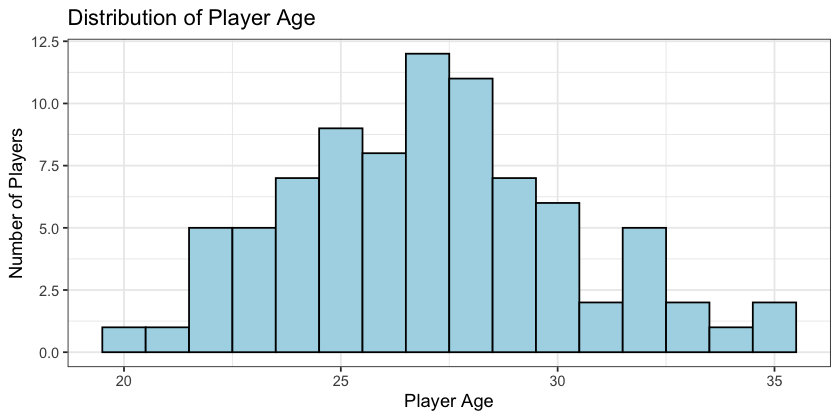

In [36]:
options(repr.plot.width = 7, repr.plot.height = 3.5)
ggplot(NBAStars, aes(age)) + geom_histogram(binwidth = 1, color = "black", fill = "light blue") + theme_bw() +
labs(title = "Distribution of Player Age", x = "Player Age", y = "Number of Players") 

The second visualization we made was a box plot that shows the distributuion of `MVP Award Share` sorted by `Position`. The plot told us that the MVP Award is awarded to players regardless of position, however, Point Guards are the Position that has recieved the most votes in the past 15 seasons. The _Box Plot_ is shown below. 

Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


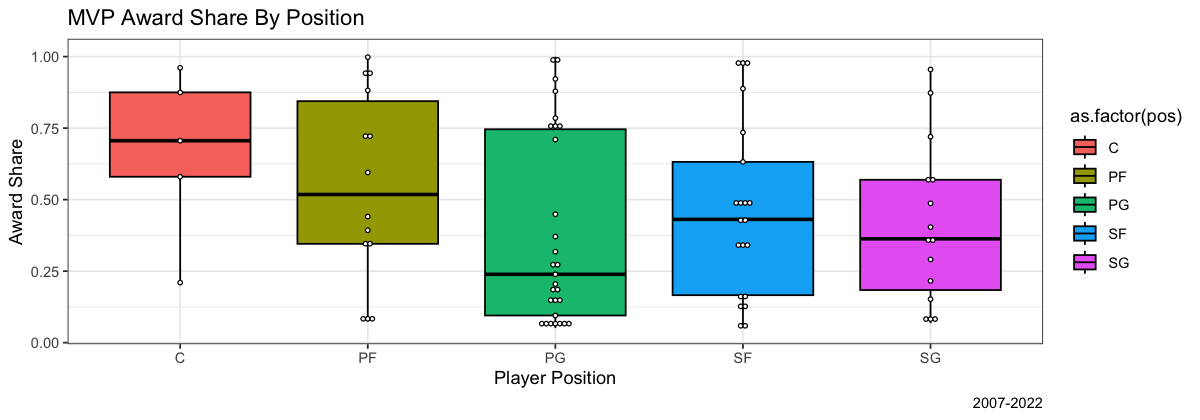

In [37]:
options(repr.plot.width = 10, repr.plot.height = 3.5)

ggplot(NBAStars, aes(x = as.factor(pos), y = MVP, fill = as.factor(pos))) + 
geom_boxplot(outlier.colour="black", outlier.shape=16,outlier.size=2, notch=FALSE, color = "black") + theme_bw() +
labs(title = "MVP Award Share By Position", caption = "2007-2022", x = "Player Position", y = "Award Share") +
geom_dotplot(binaxis='y', stackdir='center', dotsize=0.5, fill = "white")

The third visualization we created was a _pie chart_. In this chart, each "slice" of the pie chart represents a range of votes. The size of the "slice" is the percentage of players that received a voting share within the range of the "slice". For example, 19.05% of players in our data set (after filtering) received 0.2-0.4 of MVP Award Share. This visualization showed us that the MVP Award Share has a somewhat even distribution, with some bias in the 0-0.2 range. The pie chart is shown below: 

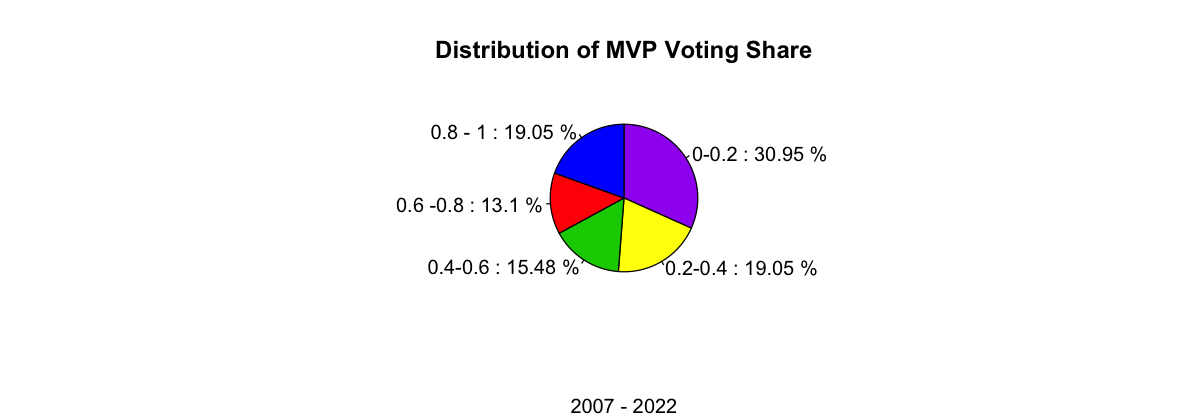

In [38]:
col = c("purple", "yellow", "green3","red", "blue")
pie(total, labels = labels, col = col, clockwise = TRUE, 
    main = "Distribution of MVP Voting Share", sub = "2007 - 2022")

The final visualization we created was a _bar plot_. The bar plot shows the Max MVP Award Share that a player received that year. This can be interpreted as: The Award Share that the _MVP Award Winner_ recieved that year. From this plot we learned that voters are in a general "agreement" on who should win MVP as the share of votes that the Winner received is high. The _Bar plot_ is shown below. 

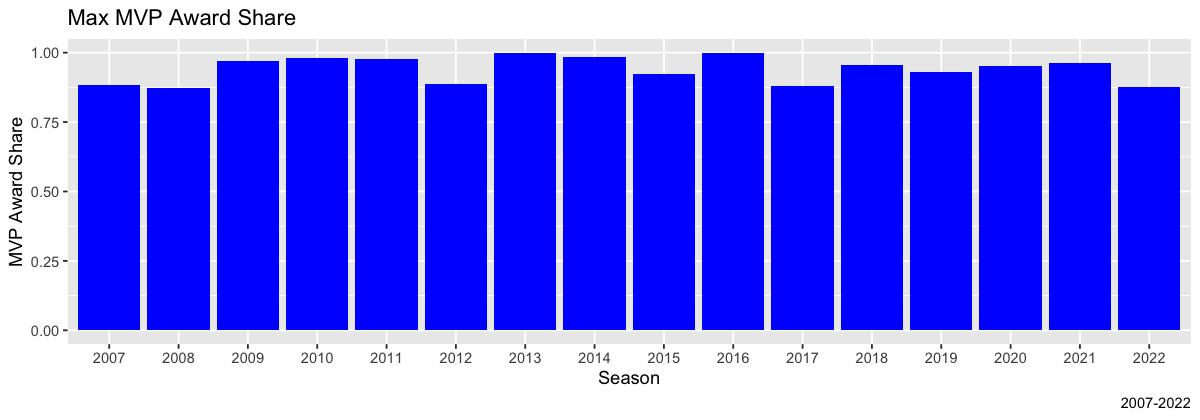

In [39]:
ggplot(pastwinners, aes(x=as.factor(season), y=MVP)) + 
geom_bar(stat = "identity",  fill = "blue")  +
 
labs(title ="Max MVP Award Share", caption = "2007-2022", x="Season", y="MVP Award Share") 

### Correlations
Once we completed some visualizations of our data, we had a good understanding of the data available to us. The next step before we began making Linear Regression Models was to explore correlations. The correlation plot below shows the correlations of all Variables to one another: 

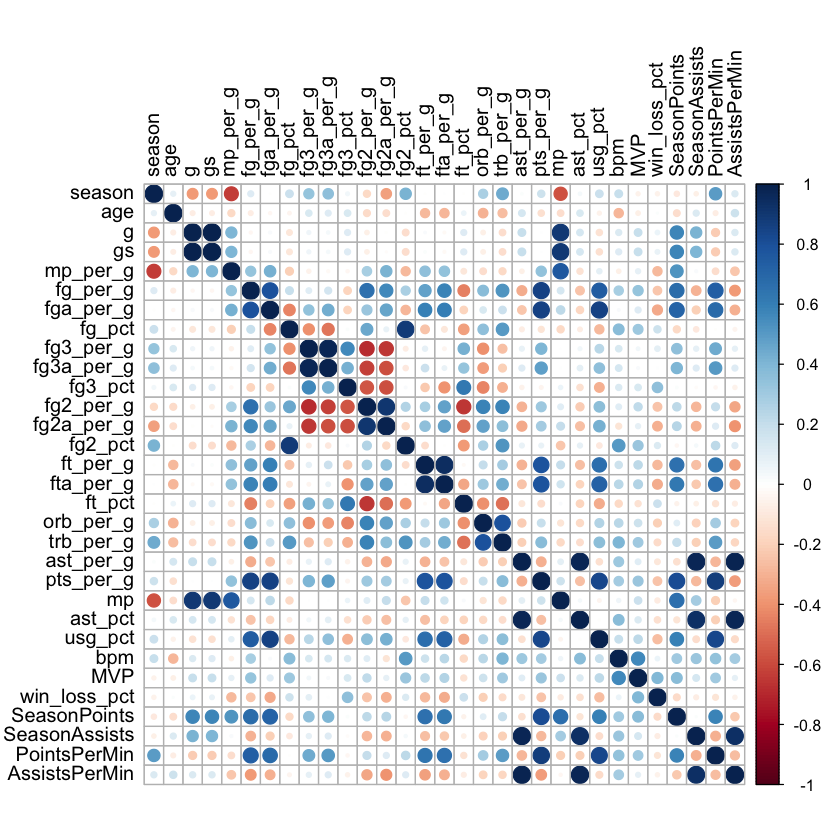

In [40]:
options(repr.plot.width = 7, repr.plot.height = 7)
correlation = cor(NBAStars.numeric)
corrplot(correlation, tl.col = "black")

As can be seen in the figure above, a _red color_ signifies a _Negative correlation_ and a _blue color_ signifies a _positive correlation_. The darker the color, the stronger the relationship is in the positive or negative direction. From the figure above we observed that `bpm` has a **strong positive correlation** to `MVP`. We also observed that `MVP` is correlated to Field Goal Percentage(`fg_pct`), Win/Loss Percentage (`win_loss_pct`) and PointsPerMin (`PointsPerMin`).

### Simple Linear Regression Models

From our observations made in the _Correlation_ section, we had a good idea on what variables would serve as the better ***predictor variables** to our **reponse Variable** `MVP`. The **predictor variables** we used to create _Simple Linear Regression Models_ to predict `MVP` were:  Box Plus-Minus (`bpm`), Points Per Minute (`PointsPerMin`), Assists Per Min (`AssistsPerMin`), Field Goal Percentage (`fg_pct`), and Win/Loss Percentage (`win_loss_pct`).

A visualization of our best performing model is shown below: 

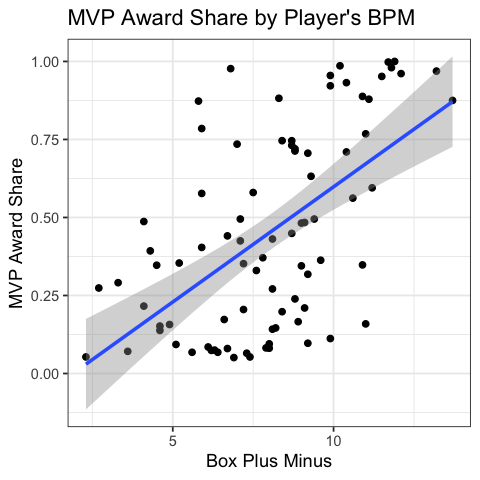

In [41]:
options(repr.plot.width = 4, repr.plot.height = 4)
ggplot(NBAStars, aes(bpm,MVP) ) +
geom_point() + theme_bw() +
geom_smooth(method = 'lm', formula = y~x) +
labs(title = "MVP Award Share by Player's BPM", x = "Box Plus Minus", y = "MVP Award Share" )



To determine our best model, we used the **Adjusted R-square**, **$R^2$**, value of each model to determine it's performance in regards to fitting our data. The best performing model we created was the one that predicted a player's MVP Award Share using Box Plus-Minus. Looking at the **$R^2$** value of this model: 0.3162054 indicates that the model can account for 31.6% of variation in a player's `MVP Award Share`. This model can be described as the mathematical equation shown below: 
$$ Y = -0.13989 + 0.07380X_1 $$

In this equation, **Y** is the player's MVP Award Share (`MVP`) while **X1** is a player's Box Plus-Minus (`bpm`). The equation shows that if a player's `Box Plus-Minus` increased by one point, the player's `MVP Award Share` will increase by 0.0738. The **y-intercept** is  -0.13989 which shows that our model is realtively weak when predicting a players `MVP` Award Share when using data that is outside of our "subset" of NBA Stars. To improve this model, the subset of NBA stars, or the criteria to be considered a "Star" can be lowered to include more players. 

### Multiple Linear Regression Models

After establishing that `bpm` can account for 31.6% of variation, we decided to see if this mode lcan be improved by combining `bpm` with additional **predictors** to create a _Multiple Linear Regression Model_. From all our the _Multiple Linear Regression Models_ we created ur best performing model used the `win_loss_pct`, `bpm`,`fg3_pct`, `SeasonPoints`, `fg_per_g` , and `mp` variables as **predictors** for our **response variable `MVP`**. The **Adjusted R-square** value for this model is: **0.5302**. This means that the model can explain 53.02% of variation in a player's `MVP` Award Share. This model had the highest **$R^2$** value of all our _Multiple Linear Regression Models_.

### Model Comparison 

Since we had determined the best performing models from both of the model "types" (Simple and Multiple Linear Regressions). We simply needed to compare the **$R^2$** values of theese two models to one another. The best performing **Simple Linear Regression Model had a $R^2$ value of: 0.316** while the best performing **Multiple Linear Regression Model had a $R^2$ value of: 0.5302**. Given the significant difference in the **$R^2$** values of the two models, it is clear the our multi-variable model, the **Multiple Linear Regression Model** was the more accurate model. This means that using more variables to predict `MVP` will result in a more accurate prediction, _so long as_ the variables used to make the predictions, the _predictors_, have a _positive linear regression_ with the _response_ variable.

### Conclusion

Given the results of our investigation's results through the analysis of the dat set acquired, **we recommend that NBA Players use our model to predict their MVP Award Share.** This model can be used to show the Award Share the player will recieve given their current stats for the season up to that point. If the player is not satisfied with the prediction, then the Player has an idea of which of their statistics they must improve to raise the MVP Award Share. For example, if a player is averaging: a 0.4 `win_loss_pct`, 3.2 `bpm`, 0.33 `fg3_pct`, 1500 `SeasonPoints`, 10 `fg_per_g`, and 2700 `mp` **results** in a 0.26 `MVP` Award Share. Then the player can modify their stats to: a 0.6 `win_loss_pct`, 5.0 `bpm`, 0.45 `fg3_pct`, 2500 `SeasonPoints`, 15 `fg_per_g`, and 3600 `mp` to see that theses stats **result** in a 0.44 `MVP` Award Share, which drastically improves their chances of winning MVP. Therefore, the player will now what benchmark in their stats to aim for to improve their chances of wnnning MVP.   
_Note: The results of using these values in our model were not performed, thisi example is theoretical to show how the model can be used._

We hope that NBA players find our analysis useful, and use our model to improve their chances of winning MVP.

# Originality 
---

Our group was unable to find similiar Linear Regression Models that used the same dataset to predict the same **response** variable. In the case that there exists similiar Linear Regression Models, we believe that our _Data Cleaning_ portion will make our solution unique. We believe this as the _Data Cleaning_ we performed made it so that the subset that we performed our _Linear Regressions_ on was very specific to our theoretical "Stakeholder" in this report, and highly unlikely that another _Linear Regression Analysis_ exists using a similiar subset of the data set we downloaded.   
